In [3]:

#importing dataset
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [6]:
#the shape of the data
print(f"X_train:{X_train.shape}\nX_test:{X_test.shape}\nNumber of Training Samples:{X_train.shape[0]}\nNumber of Testing samples:{X_test.shape[0]}")

X_train:(60000, 28, 28)
X_test:(10000, 28, 28)
Number of Training Samples:60000
Number of Testing samples:10000


In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [8]:
#Converting targets to binary class metrics
from keras import utils
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [10]:
#Displaying a sample train image array and label
import numpy as np
arr = y_train[100]
arr = np.argmax(arr)
arr

5

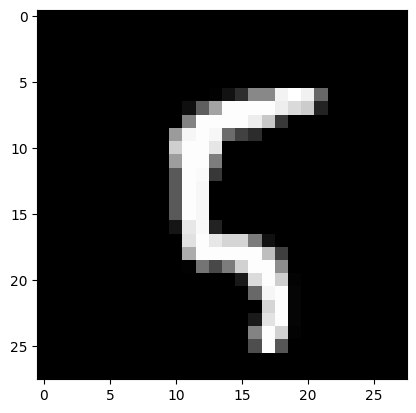

In [14]:
#diplaying the image 
import matplotlib.pyplot as plt
plt.imshow(X_train[100],cmap='gray')

In [15]:
#Building our CNN model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

model = Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(10,activation='softmax')
        
   
    ]
)

model

I0000 00:00:1763372574.441722      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763372574.442373      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


<Sequential name=sequential, built=True>

In [16]:
#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [18]:
#Training the model
hist = model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test,y_test),verbose=2)


Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9477 - loss: 0.1690 - val_accuracy: 0.9724 - val_loss: 0.0917
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9539 - loss: 0.1487 - val_accuracy: 0.9752 - val_loss: 0.0794
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9569 - loss: 0.1385 - val_accuracy: 0.9766 - val_loss: 0.0719
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9591 - loss: 0.1303 - val_accuracy: 0.9692 - val_loss: 0.0975
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9597 - loss: 0.1260 - val_accuracy: 0.9794 - val_loss: 0.0689


In [19]:
#Evaluating the model's performance
val_loss,val_acc = model.evaluate(X_train,y_train)
print(val_loss,val_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0377
0.03938506171107292 0.9868999719619751


In [20]:
#Model Prediction
user_input = model.predict(X_train[100].reshape(1,28,28,1))
user_input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


array([[1.4546253e-05, 2.7470751e-06, 2.7816948e-06, 6.4133725e-05,
        8.7930255e-07, 9.6883470e-01, 2.8939636e-02, 9.3162178e-08,
        2.0653408e-03, 7.5023192e-05]], dtype=float32)

In [21]:
label = np.argmax(user_input)
label

5

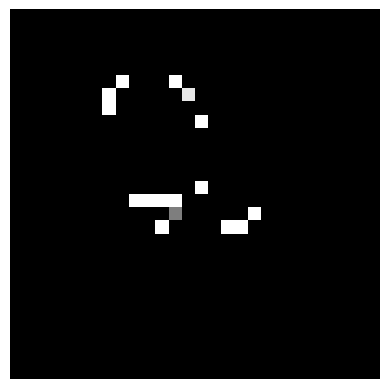

In [37]:
#testing with a new data
from keras.preprocessing import image
img = image.load_img('/kaggle/input/two-num/two_.png',target_size=(28,28))
plt.imshow(img)
plt.axis('off')
plt.show()

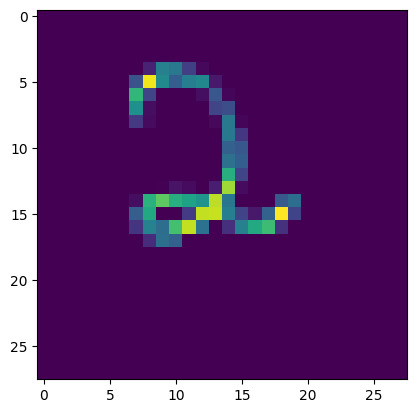

In [38]:
#resizing the image
from PIL import Image,ImageOps
gray_img = Image.open("/kaggle/input/two-num/two_.png").convert('L')
resize_img = gray_img.resize((28,28))
plt.imshow(resize_img)

In [40]:
input_user = np.array(resize_img)
input_user = model.predict([input_user.reshape(1,28,28,1)])
print(input_user)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.00952019 0.08447336 0.66323155 0.0845989  0.05485127 0.00478349
  0.01778378 0.04888755 0.02292701 0.00894292]]


In [41]:
result = np.argmax(input_user)
result

2

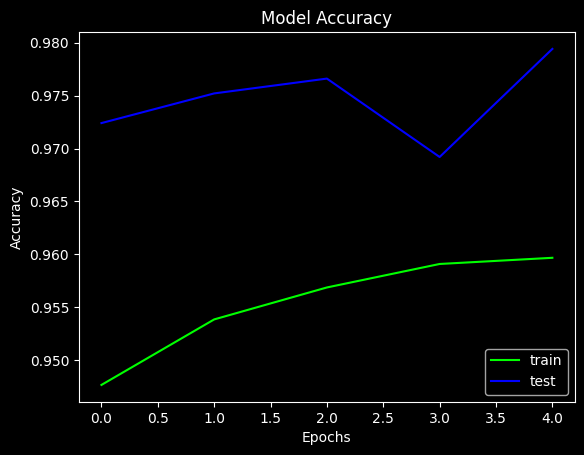

In [42]:
#Visualization of accuracy at each epochs
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.plot(hist.history['accuracy'],color='lime')
plt.plot(hist.history['val_accuracy'],color='blue')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.show()


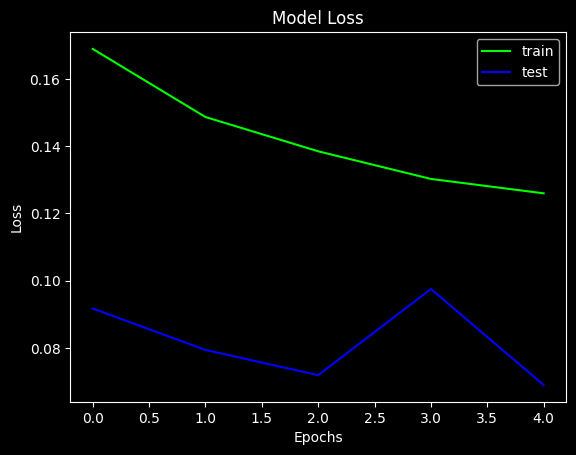

In [43]:
#Visualization of  loss function at each epoch
plt.style.use('dark_background')
plt.plot(hist.history['loss'],color='lime')
plt.plot(hist.history['val_loss'],color='blue')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


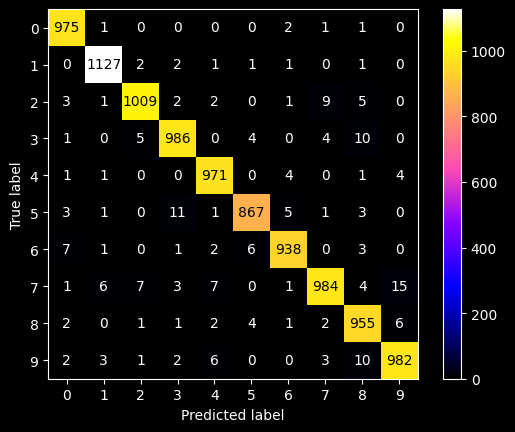

In [50]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)
y_test_decoded = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_test_decoded,y_pred)

disp = ConfusionMatrixDisplay(cm,display_labels=range(10))
disp.plot(cmap='gnuplot2')
plt.style.use('dark_background')
plt.show()

In [58]:
#saving the model
keras.saving.save_model(model,'MODEL.keras')